In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys;src_dir = os.path.join(os.getcwd(), os.pardir, 'src');sys.path.append(src_dir)

In [24]:
from data.dal import DAL
import pandas as pd
import numpy as np
import dtaidistance
from dtaidistance import dtw
from tqdm import tqdm
import models.nndtw as nn
import sklearn.model_selection
import sklearn.model_selection

In [3]:
split = DAL("split.hdf")

In [4]:
split.overview()
dfs =[split.get(k) for k in split.overview().df_key]

In [24]:

dm = nn.distance_matrix(dfs)
np.save("../data/distance_matrix.npy",dm)

100%|██████████| 75/75 [3:01:38<00:00, 145.31s/it]  


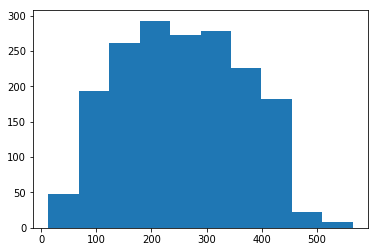

In [5]:
import matplotlib.pyplot as plt
dm = np.load("../data/distance_matrix.npy")
plt.hist(dm[2][5:])
plt.show()

In [34]:
labels = split.overview()
labels["correct"] = labels.execution_type == 1
X = np.array(list(range(0,len(labels))))
sets = [int(x.replace("skeleton_","")) //100 for x in labels.df_key]
cv2 = lambda : sklearn.model_selection.GroupKFold(10).split(X,groups=sets)
cv3 = lambda : sklearn.model_selection.GroupKFold(10).split(X,groups=labels.person)

clf = nn.DTWClassifier("../data/distance_matrix.npy")
results = []
for t in ["exercise","correct","execution_type"]:
    y = labels[t].values
    exercisetrans = sklearn.preprocessing.LabelEncoder()
    y = exercisetrans.fit_transform(y)
    for cvname,cv in [("Leave-one-set-out CV",cv2),
                    ("Leave-one-subject-out CV",cv3)]:
        scores = sklearn.model_selection.cross_validate(clf,X,y,cv=cv(),return_train_score=True,scoring="accuracy")
        result = (t,"DTW",cvname,scores)
        print(result)
        results.append(result)

('exercise', 'DTW', 'Leave-one-set-out CV', {'fit_time': array([0.00377393, 0.0036962 , 0.00369596, 0.00369096, 0.00367522,
       0.00369835, 0.00366926, 0.00367999, 0.00367022, 0.00367498]), 'score_time': array([0.00123501, 0.00109076, 0.00107074, 0.00106144, 0.00104976,
       0.0010519 , 0.00102592, 0.0010643 , 0.00102568, 0.00105786]), 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])})
('exercise', 'DTW', 'Leave-one-subject-out CV', {'fit_time': array([0.00368404, 0.00367713, 0.00369024, 0.0036695 , 0.00367141,
       0.00366759, 0.00369525, 0.00367737, 0.00367641, 0.00368857]), 'score_time': array([0.00107193, 0.00105524, 0.00104809, 0.00102758, 0.00103641,
       0.00104499, 0.00116873, 0.0009973 , 0.00099564, 0.00097871]), 'test_score': array([1.        , 1.        , 1.        , 0.67403315, 0.97222222,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'train_score': array([1., 1., 1.

In [35]:
import scipy.stats as stats

res = pd.DataFrame(results,columns=["y","clf","cv","scores"])

def summarize(scores):
    s = scores["test_score"]
    lo,hi = stats.t.interval(alpha = 0.95,              # Confidence level
                 df= len(s)-1,                    # Degrees of freedom
                 loc = s.mean(),         # Sample mean
                 scale = s.std())
    return s.mean()#"%.3f pm %.3f" % ((lo+hi)/2,(hi-lo)/2)

def t(y):
    if y == "exercise":
        return "t1"
    if y == "correct":
        return "t2"
    if y == "execution_type":
        return "t3"
def shortcv(cv):
    if cv == "Leave-one-set-out CV":
        return "$CV_{set}$"
    if cv == "Leave-one-subject-out CV":
        return "$CV_{subject}$"
    
res["t"] = res.y.apply(t)
res["scores"] = res.scores.apply(summarize)
res["shortcv"] = res.cv.apply(shortcv)

#res = res[res.y == "execution_type"]
#res.pivot(index=0,columns=1,values=2)
#print(res.pivot(index="clf",columns="cv",values="scores").to_latex())
df = res.pivot_table(index="clf",columns=["t","shortcv"],values="scores")

print(df.applymap(lambda x: '%.3f' % x).to_latex())

\begin{tabular}{lllllll}
\toprule
t & \multicolumn{2}{l}{t1} & \multicolumn{2}{l}{t2} & \multicolumn{2}{l}{t3} \\
shortcv & \$CV\_\{set\}\$ & \$CV\_\{subject\}\$ & \$CV\_\{set\}\$ & \$CV\_\{subject\}\$ & \$CV\_\{set\}\$ & \$CV\_\{subject\}\$ \\
clf &            &                &            &                &            &                \\
\midrule
DTW &      1.000 &          0.965 &      0.840 &          0.623 &      0.627 &          0.555 \\
\bottomrule
\end{tabular}



In [ ]:
totaldist = dists[0].copy()
for i in range(1,len(dists)):
    totaldist += dists[i]

printm(totaldist)

In [ ]:
#print(dists)
#print(totaldist)
def printm(m):
    for row in m:
        print(["%.1f" % x for x in row])
for d in dists:
    printm(d)
printm(totaldist)